In [1]:
import os

from src.load_data import load_matches
from src.offball_wrappers import a_obr_per_subtype,a_obr_per_subtype_per_phase, a_obr_per_subtype_per_team, a_obr_per_subtype_per_player, a_xthreat_per_run_group
from src.density_change import a_ddc_distance_player, metric_ddc
from src.space_creation import metric_sc
from src.tracking_functions import find_frame_start_end, get_player_coordinates, get_opp_team_players_coordinates, get_team_players_coordinates, get_frame_object
from src.overall_profile import obr_radar_all
from src.physical_data import get_physical_data_processed
from src.preprocessing import player_minutes_per_match

## IMPORTANT
The probability that a goal will be scored 10 seconds after a player is successfully served a pass.
If the player was not targeted by a pass, it is calculated at the passing moment. <-- This is the way they say how good a runner is or the effect that he has. However, this only refers if he receives the pass. But a lot of move form midfielders is not to receive the ball but to generate space or create passing options. Thats why we are doing this.!!!!

-----------------------------------------------------------------------------------------------------


2. Quadrant talent map
Make a 2D scatter:

x‑axis: space_creation per run (or per90).

y‑axis: defensive_density_change per run (or per90).

Color or size points by number of runs per90. Then define quadrants:

Top‑right: “elite space finders” – create space and get free a lot.

Top‑left: “pressure escapists” – get free but don’t open much space behind.

Bottom‑right: “space openers for others” – create space where they were but stay more marked.

Bottom‑left: low impact movers.

This is a very clear talent‑ID picture: look for young/underused players in the top‑right with decent volume.

-----------------------------------------------------------------------------------------------------

Use these type of runs for space_created (and maybe def density change too): BUILD UP RUNS

The others are more in line with xthreat if they receive the ball: PROGRESSION AND DIRECT RUNS

AND AMAZING EXEMPLE OF SPACE CREATED Plotting event ID: 1_91, Player ID: 11117, Subtype: coming_short, Plotting event ID: 1_102, Player ID: 11117, Subtype: coming_short

-----------------------------------------------------------------------------------------------------

### Recommended radar with that choice
Given everything so far, a clean, phase-aligned impact radar could be:

Defensive density change – Build-up runs

Space creation – Build-up runs

Defensive density change – Progression runs

xThreat – Progression runs

xThreat – Direct runs

Distance covered in possession – per 90

All per 90, role-relative percentiles.

-----------------------------------------------------------------------------------------------------

In [2]:
# load matches
data_path = os.path.join(os.getcwd(), "src/data")
all_tracking, dynamic_events_all, all_metadata = load_matches(data_path)

c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (75,77,184,264) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)
c:\Users\g4a4b\OneDrive - University of Twente\SportsAnalyticsProject\analytics_cup_research\src\load_data.py:56: DtypeWarning: Columns (276) have mixed types. Specify dtype option on import or set low_memory=False.
  de_match = pd.read_csv(url)


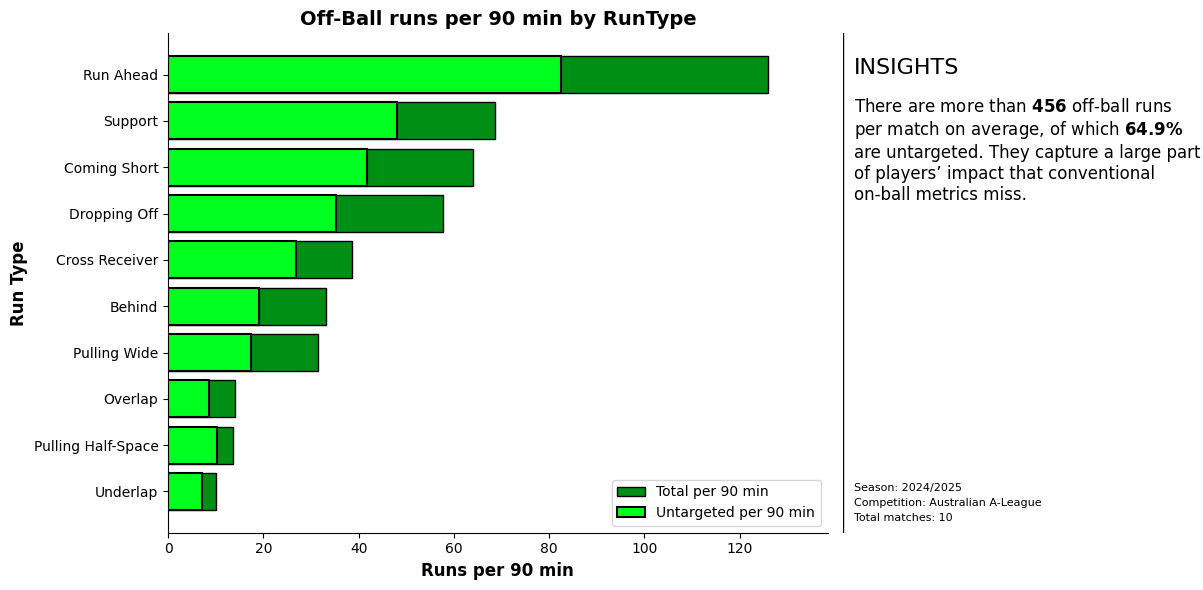

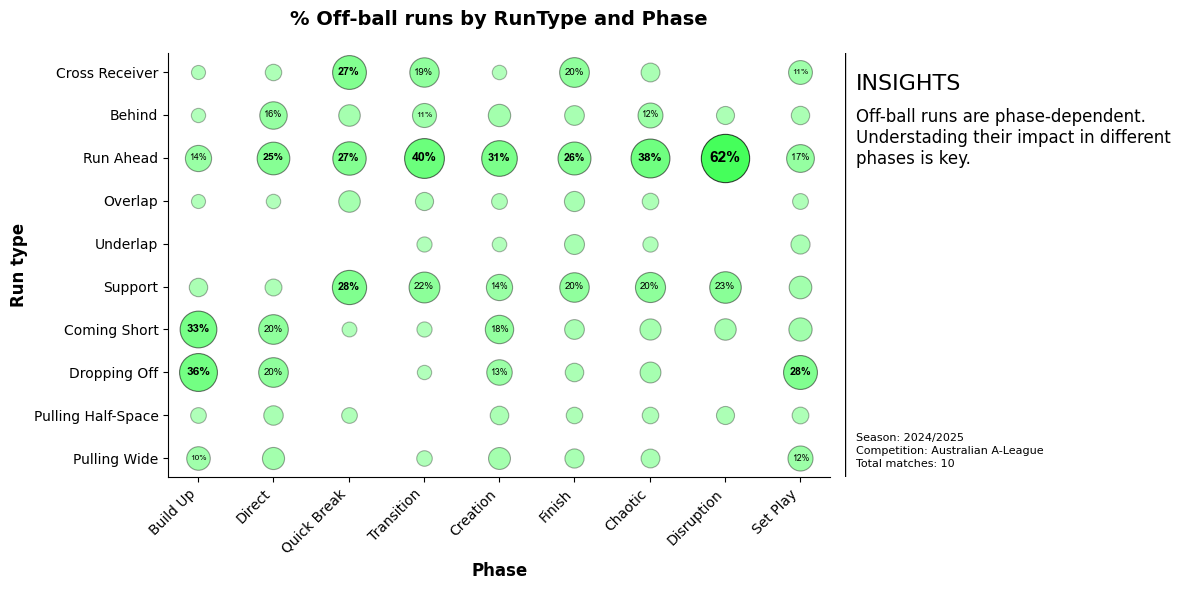

In [3]:
# analysis of off ball runs per 90 minutes
a_obr_per_subtype(all_tracking,dynamic_events_all)

# analysis of off ball runs per subtype per phase
a_obr_per_subtype_per_phase(dynamic_events_all)

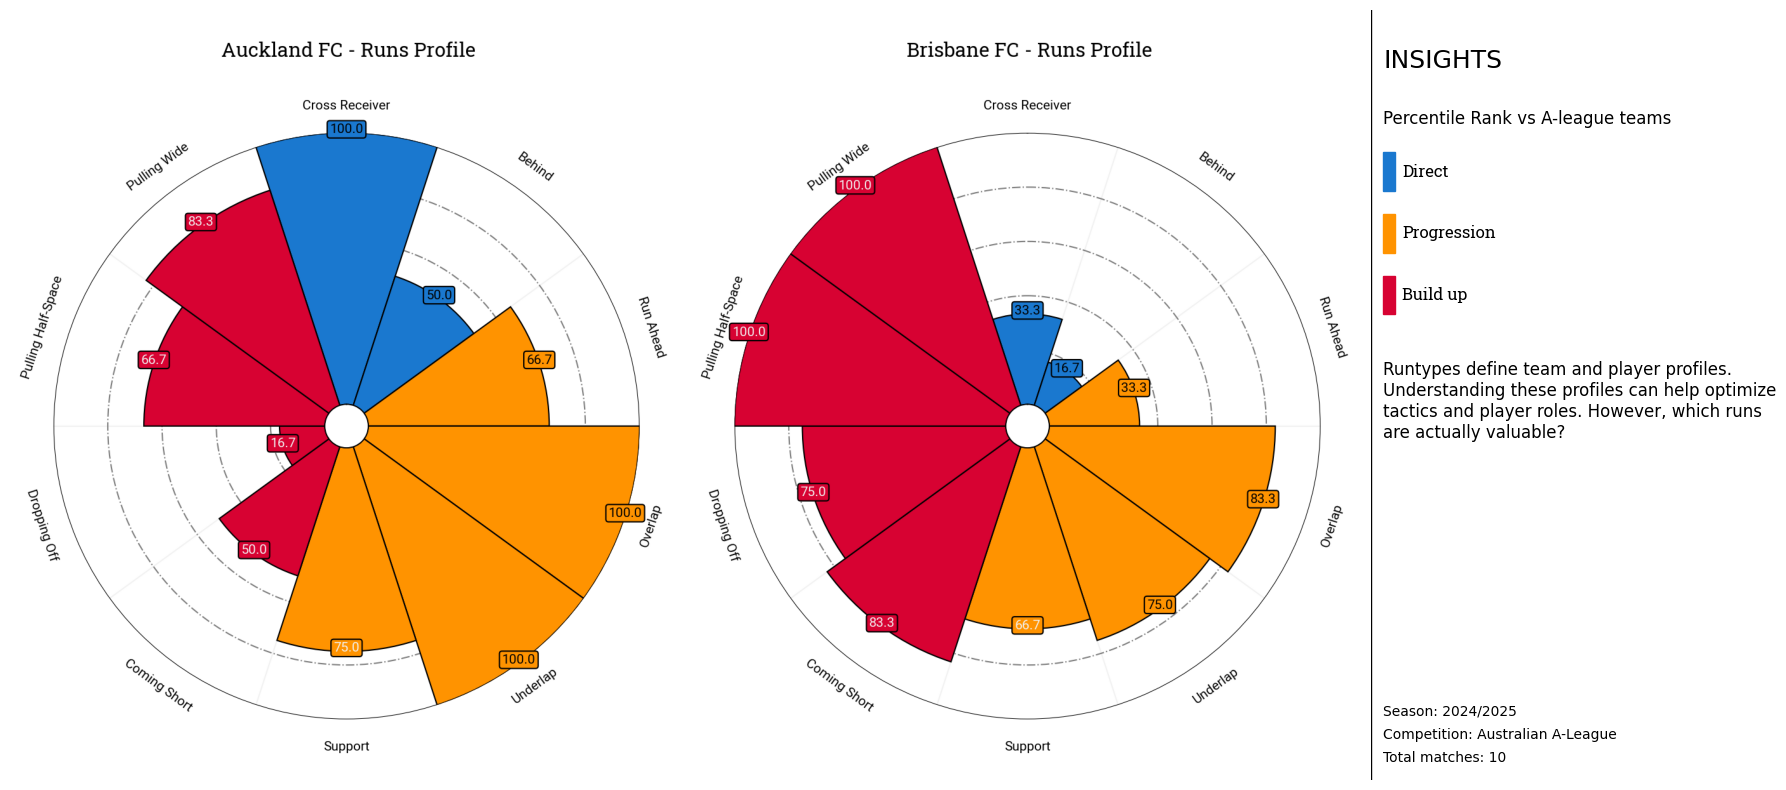

In [4]:
# analysis of off ball runs per subtype per team per 90 minutes
a_obr_per_subtype_per_team(all_tracking, dynamic_events_all, teams_shortnames=["Auckland FC", "Brisbane FC"])

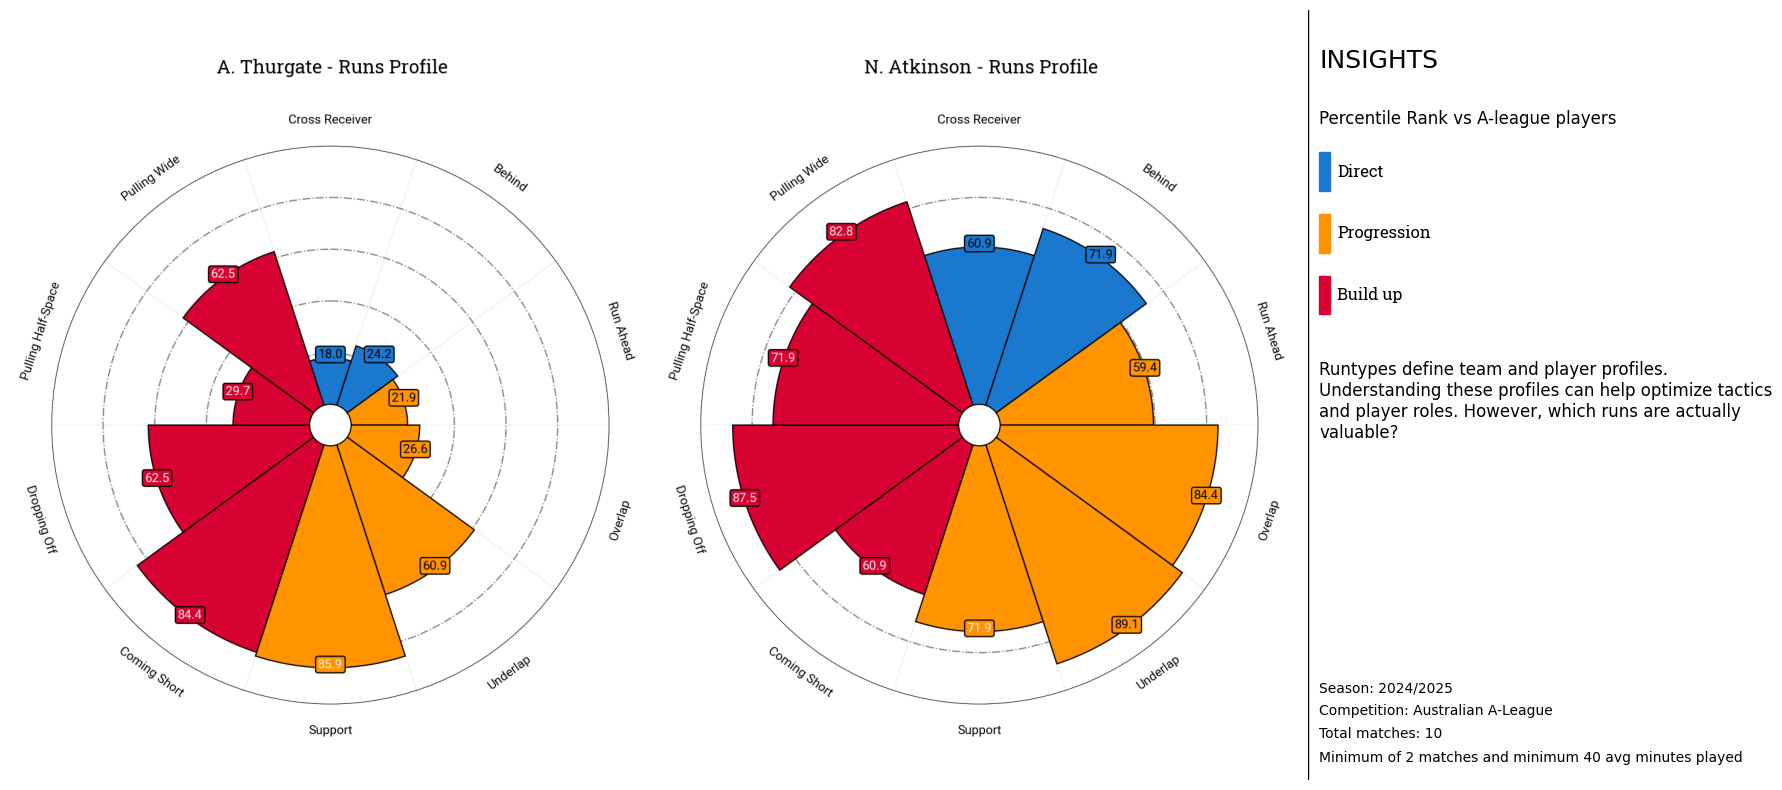

In [5]:
# analysis of off ball runs per subtype per player per 90 minutes
a_obr_per_subtype_per_player(all_metadata, dynamic_events_all, players_names = ["A. Thurgate", "N. Atkinson"], min_matches=2, min_avg_minutes_played=40)


Midfielders rank second in how evenly their off‑ball runs are spread across different run types, very close to forwards, while still accounting for a substantial share of all runs. Combined with the available physical aggregation data for this position group, this makes midfielders a natural choice for a deeper analysis of how off‑ball movement creates space and passing options.

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


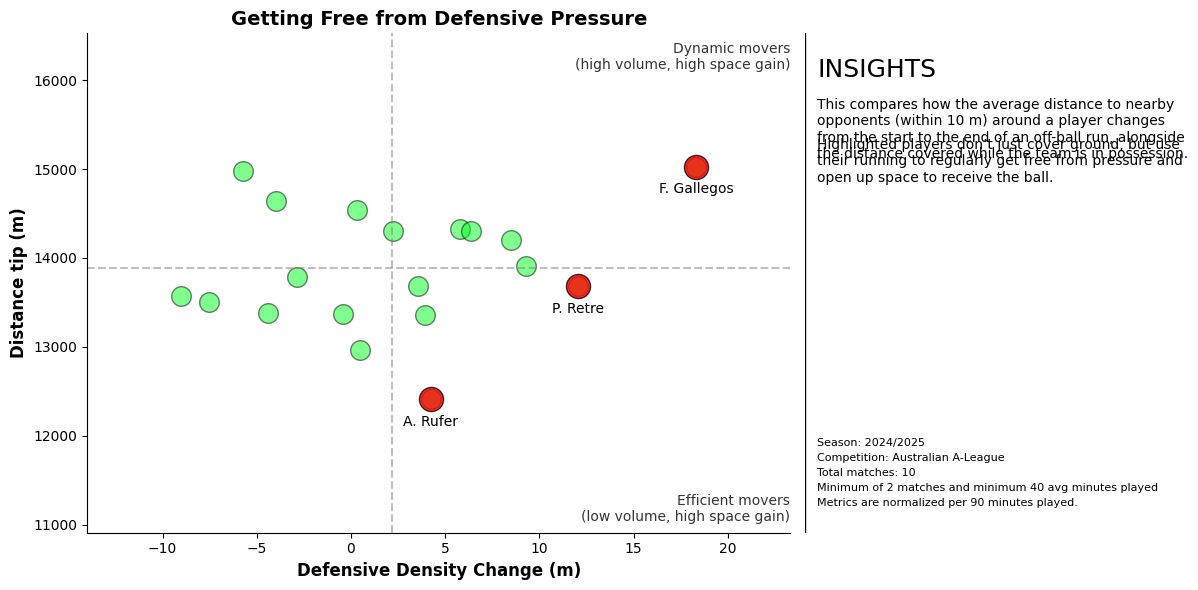

In [4]:
a_ddc_distance_player(dynamic_events_all, all_tracking, all_metadata, data_path, min_matches=2, min_avg_minutes_played=40)

In [3]:
mid_obr_grouped, mid_obr_merged = metric_sc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298
Number of events after processing for space created: 291
Number of events after calculating space created for Build Up Runs: 291
Number of events after removing outliers for space created: 255


In [13]:
print(mid_obr_grouped)
print(mid_obr_merged)

    player_id  space_created  total_minutes  space_created_per90min
0       11117     -71.104112         183.18              -34.934873
1       14736    -309.194518         317.33              -87.692644
2       23418      85.862086         328.12               23.551102
3       26969     -41.314681         159.53              -23.307975
4       27003      15.968713         143.01               10.049536
5       50951    -108.228816         219.39              -44.398530
6       50992     210.477033         197.47               95.928156
7       51015     -25.826843         199.67              -11.641287
8       51045     219.580997         190.65              103.657433
9       51046     -44.699575          88.17              -45.627330
10      51675    -397.080386         180.31             -198.198851
11      51681    -158.406855         120.48             -118.331814
12     104563    -313.039389         197.47             -142.672533
13     133854     -61.373222         121.18     

In [3]:
mid_obr_ddc, mid_obr_ddc_third = metric_ddc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674


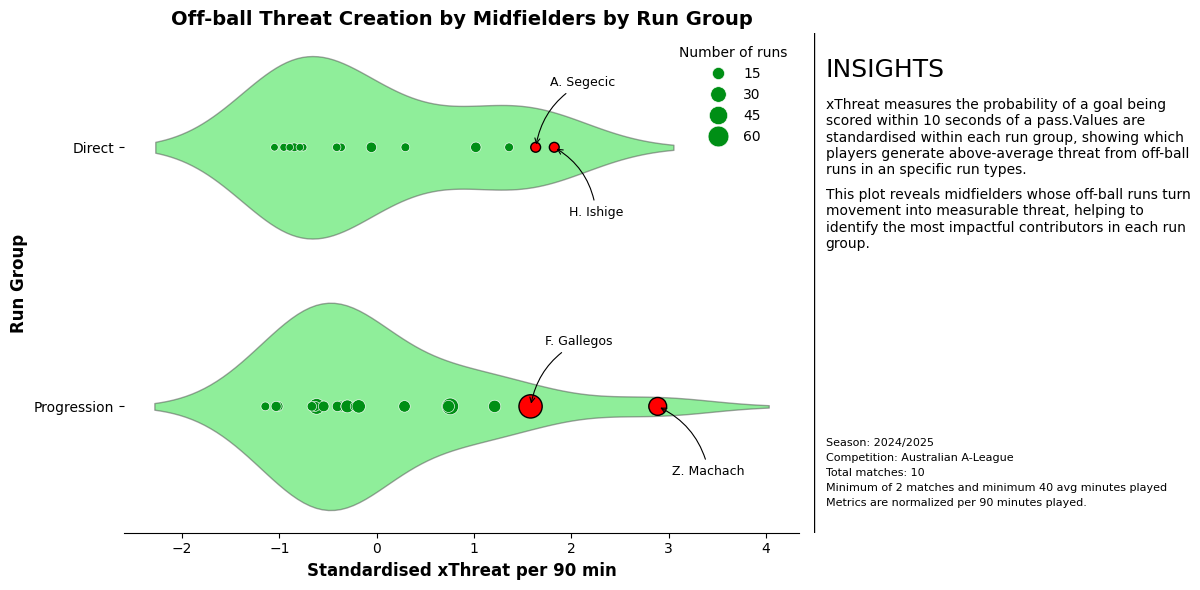

In [5]:
a_xthreat_per_run_group(dynamic_events_all, all_metadata, min_matches=2, min_avg_minutes_played=40)

In [5]:
mid_obr_radar = obr_radar_all(all_metadata, all_tracking, dynamic_events_all, data_path, min_matches=2, min_avg_minutes_played=40)
print(mid_obr_radar)

Number of events to process for defensive density change: 691
Number of events after cleaning for defensive density change: 674
Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298
Number of events after processing for space created: 291
Number of events after calculating space created for Build Up Runs: 291
Number of events after removing outliers for space created: 255
    player_id  ddc_build_up  index  space_created  total_minutes  \
0       11117      3.298741      0     -71.104112         183.18   
1       14736     -2.069562      1    -309.194518         317.33   
2       23418      6.201562      2      85.862086         328.12   
3       26969     -0.557354      3     -41.314681         159.53   
4       27003     -4.018917      4      15.968713         143.01   
5       50951      2.631715      5    -108.228816         219.39   
6       50992      4.549862      6     210.477033         197.47   
7       51015      2.862927 

In [6]:
mid_obr_radar.to_csv("radar_df_all.csv", index=False)




In [ ]:
_,df = metric_sc(dynamic_events_all, all_tracking, all_metadata, min_matches=2, min_avg_minutes_played=40)

Number of events after filtering for Build Up Runs: 304
Number of events to process for space created: 298
Number of events after processing for space created: 291
Number of events after calculating space created for Build Up Runs: 291
Number of events after removing outliers for space created: 255


In [4]:
# read csv
import pandas as pd
df = pd.read_csv("space_creation_metrics.csv")
from src.space_creation import animate_run_by_event_id
event_id = "1_91"

animate_run_by_event_id(event_id,df,all_tracking)

POLYGON ((1.3038347884486212 7.546816655473472, 5.3194280230326285 4.506975047984644, 5.594113505789897 -6.846691572649065, 4.553608511754744 -7.249092535319885, 0.4339379792394738 6.9175296020030235, 1.3038347884486212 7.546816655473472))
POLYGON ((1.3038347884486212 7.546816655473472, 5.3194280230326285 4.506975047984644, 5.594113505789897 -6.846691572649065, 4.553608511754744 -7.249092535319885, 0.4339379792394738 6.9175296020030235, 1.3038347884486212 7.546816655473472))
POLYGON ((1.3038347884486212 7.546816655473472, 5.3194280230326285 4.506975047984644, 5.594113505789897 -6.846691572649065, 4.553608511754744 -7.249092535319885, 0.4339379792394738 6.9175296020030235, 1.3038347884486212 7.546816655473472))
POLYGON ((1.3038347884486212 7.546816655473472, 5.3194280230326285 4.506975047984644, 5.594113505789897 -6.846691572649065, 4.553608511754744 -7.249092535319885, 0.4339379792394738 6.9175296020030235, 1.3038347884486212 7.546816655473472))
POLYGON ((6.422284974491758 -6.480630399